In [1]:
from math import sqrt

import torch
import matplotlib.pyplot as plt

from torchfem import Truss
from torchfem.materials import IsotropicElasticity1D

torch.set_default_dtype(torch.double)

material = IsotropicElasticity1D(1.0)

## Figure 5.1 - Truss sample

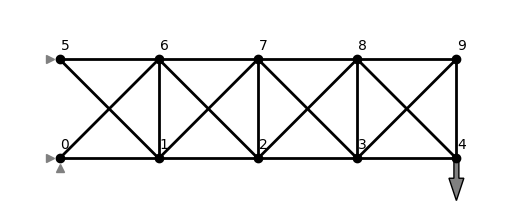

In [2]:
n1 = torch.linspace(0.0, 4.0, 5)
n2 = torch.linspace(0.0, 1.0, 2)
n1, n2 = torch.stack(torch.meshgrid(n1, n2, indexing="xy"))
nodes = torch.stack([n1.ravel(), n2.ravel()], dim=1)

elements = torch.tensor(
    [
        [0, 1],
        [1, 2],
        [2, 3],
        [3, 4],
        [5, 6],
        [6, 7],
        [7, 8],
        [8, 9],
        [1, 5],
        [0, 6],
        [2, 6],
        [1, 7],
        [3, 7],
        [2, 8],
        [4, 8],
        [3, 9],
        [1, 6],
        [2, 7],
        [3, 8],
        [4, 9],
    ]
)

truss = Truss(nodes, elements, material)

truss.forces[4, 1] = -0.1
truss.constraints[0, 0] = True
truss.constraints[0, 1] = True
truss.constraints[5, 0] = True
truss.areas[:] = 10.0


u, f, sigma, _, _ = truss.solve()
truss.plot()
plt.savefig("../figures/truss_sample.svg", bbox_inches="tight")
plt.show()

## Figure 5.2 - Single truss element

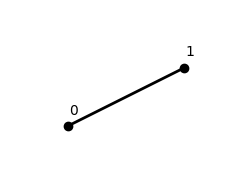

In [3]:
nodes = torch.tensor([[0.0, 0.0], [1.0, 0.5]])
elements = torch.tensor([[0, 1]])


single_truss = Truss(nodes, elements, material)
fig, ax = plt.subplots(figsize=(3, 3))
single_truss.plot(ax=ax)
plt.savefig("../figures/single_truss.svg", bbox_inches="tight")
plt.show()

## Figure 5.3 - Truss sample

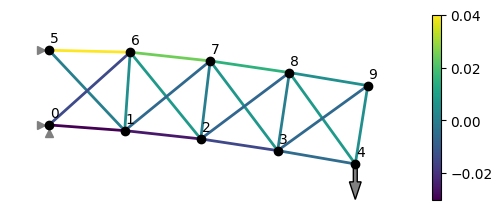

In [4]:
truss.plot(u=u, element_property=sigma)
plt.savefig("../figures/truss_sample_solved.svg", bbox_inches="tight")
plt.show()

## Example 26 - Three bar truss

Consider the truss shown below, which is subjected to a force $P$ indicated by the gray arrow and supports indicated by gray triangles. It has three nodes 
$$
    \mathcal{N} = \{\mathbf{x}^0=(1,0)^\top, \mathbf{x}^1=(0,0)^\top,\mathbf{x}^2=(0,1)^\top \}
$$
and three elements 
$$
    \mathcal{E} = \{(\mathbf{x}^0, \mathbf{x}^1), (\mathbf{x}^0, \mathbf{x}^2), (\mathbf{x}^1, \mathbf{x}^2)\}.
$$

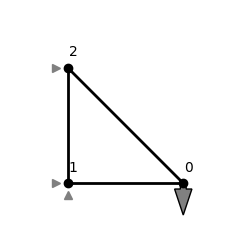

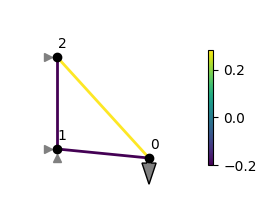

In [5]:
nodes = torch.tensor([[1.0, 0.0], [0.0, 0.0], [0.0, 1.0]])
elements = torch.tensor([[0, 1], [0, 2], [1, 2]])
material = IsotropicElasticity1D(10.0)

three_bar_truss = Truss(nodes, elements, material)
three_bar_truss.forces[0, 1] = -0.2
three_bar_truss.constraints[1, 0] = True
three_bar_truss.constraints[1, 1] = True
three_bar_truss.constraints[2, 0] = True

fig, ax = plt.subplots(figsize=(3, 3))
three_bar_truss.plot(ax=ax)
plt.savefig("../figures/three_bar_truss.svg", bbox_inches="tight", transparent=True)
plt.show()

u, f, sigma, _, _ = three_bar_truss.solve()
fig, ax = plt.subplots(figsize=(3, 3))
three_bar_truss.plot(u=u, element_property=sigma, ax=ax)
plt.savefig(
    "../figures/three_bar_truss_solved.svg", bbox_inches="tight", transparent=True
)
plt.show()